In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

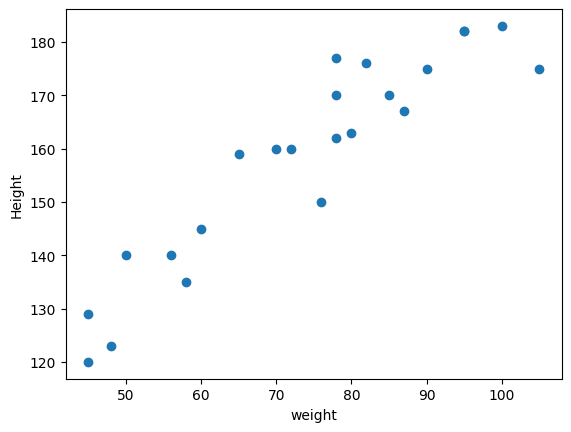

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('Height')

In [8]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


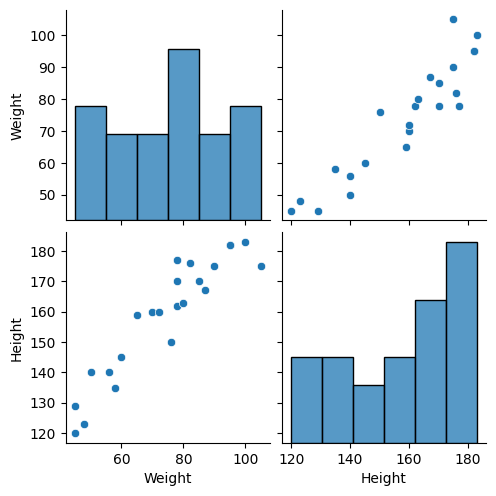

In [9]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
#independent variable should always be in either dataframe or 2 dimentional array
X = df[['Weight']]
type(X)

pandas.core.frame.DataFrame

In [12]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [ ]:
#dependent variable should be in series on 1 dimentional array
y = df['Height']
print(type(y))
print(np.array(y).shape)
y.head()

<class 'pandas.core.series.Series'>
(23,)


0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
#standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
#here we are using fit_transform , so that it will caluculate zscore by using its mean and std.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [25]:
#here we are using transfrom only so that it will calculate mean and std from X_train and there will be no data leakage
#so that the model does not know the training data set.
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [26]:
#linear regression model
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [28]:
print('coeff or slope: ', regression.coef_ )
print('Intercept: ' ,regression.intercept_)

coeff or slope:  [17.2982057]
Intercept:  156.47058823529412


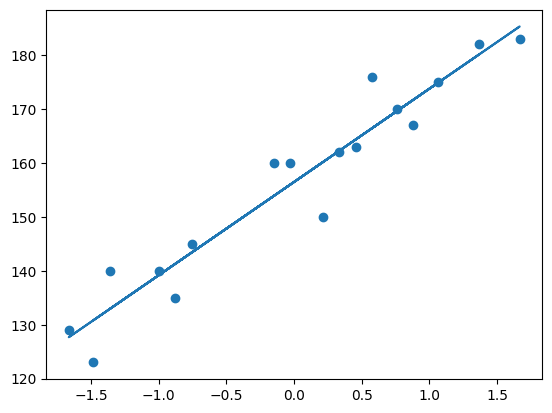

In [30]:
#plot training data and best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

Predict the Data from Model

In [32]:
y_pred = regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [34]:
#performance metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


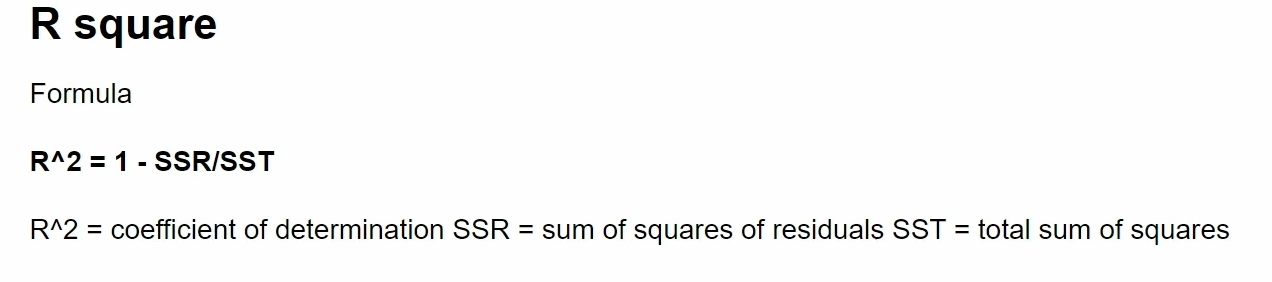

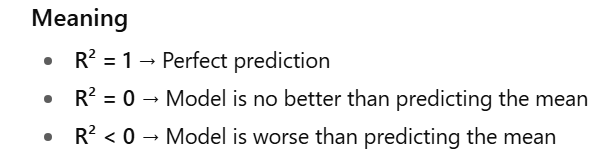

In [35]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


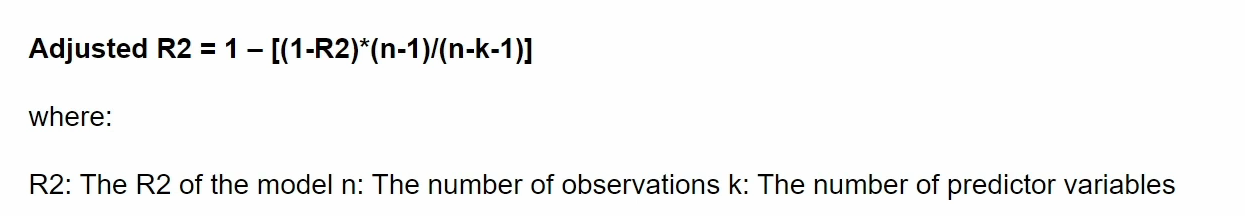

In [40]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

Now Try the same using OLS Model

In [43]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/df/4c/2feda3a9f0e17444a84ba5398ada6a4d2e1b8f832760048f04e2b8ea0c41/statsmodels-0.14.5-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/87/2b/b50d3d08ea0fc419c183a84210571eba005328efa62b6b98bc28e9ead32a/patsy-1.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9.6 MB 12.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/9.6 MB 25.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.6 MB 25.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.6 MB 23.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.6 MB 23.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.6 MB 23.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()
model

In [46]:
y_pred_ols = model.predict(X_test)
y_pred_ols

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [48]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 10 Aug 2025   Prob (F-statistic):                       0.664
Time:                        17:42:11   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\MHarikrishna\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
#predict the output from simple regression

regression.predict([[72]])

array([1401.94139895])

In [51]:
#use stabdardization to get the correct output, because you standardized the data set
regression.predict(scaler.transform([[72]]))

C:\Users\MHarikrishna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])